In [ ]:
import pandas as pd
import numpy as np
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model 
import shap
shap.initjs()

d:\DevTools\Runtimes\anaconda3\envs\figplots\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
data = pd.read_csv("../data_sets/scaled_annual_data_JFE.csv")
y = data.iloc[:,2]
X = data.iloc[:,3:]

In [ ]:
# 拟合 OLS 模型
model = linear_model.LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 解释器
explainer = shap.Explainer(model,X)

In [ ]:
# 获取 SHAP 值
shap_values = explainer(X)

#### Variable importance 

In [ ]:
# 计算每个特征的平均绝对SHAP值
abs_shap_values = np.abs(shap_values.values)
abs_shap_values = pd.DataFrame(abs_shap_values,columns=X.columns)
abs_shap_values_mean=abs_shap_values.mean(0)
abs_shap_values_mean = abs_shap_values_mean.sort_values(ascending=False)
my_order = abs_shap_values_mean.index

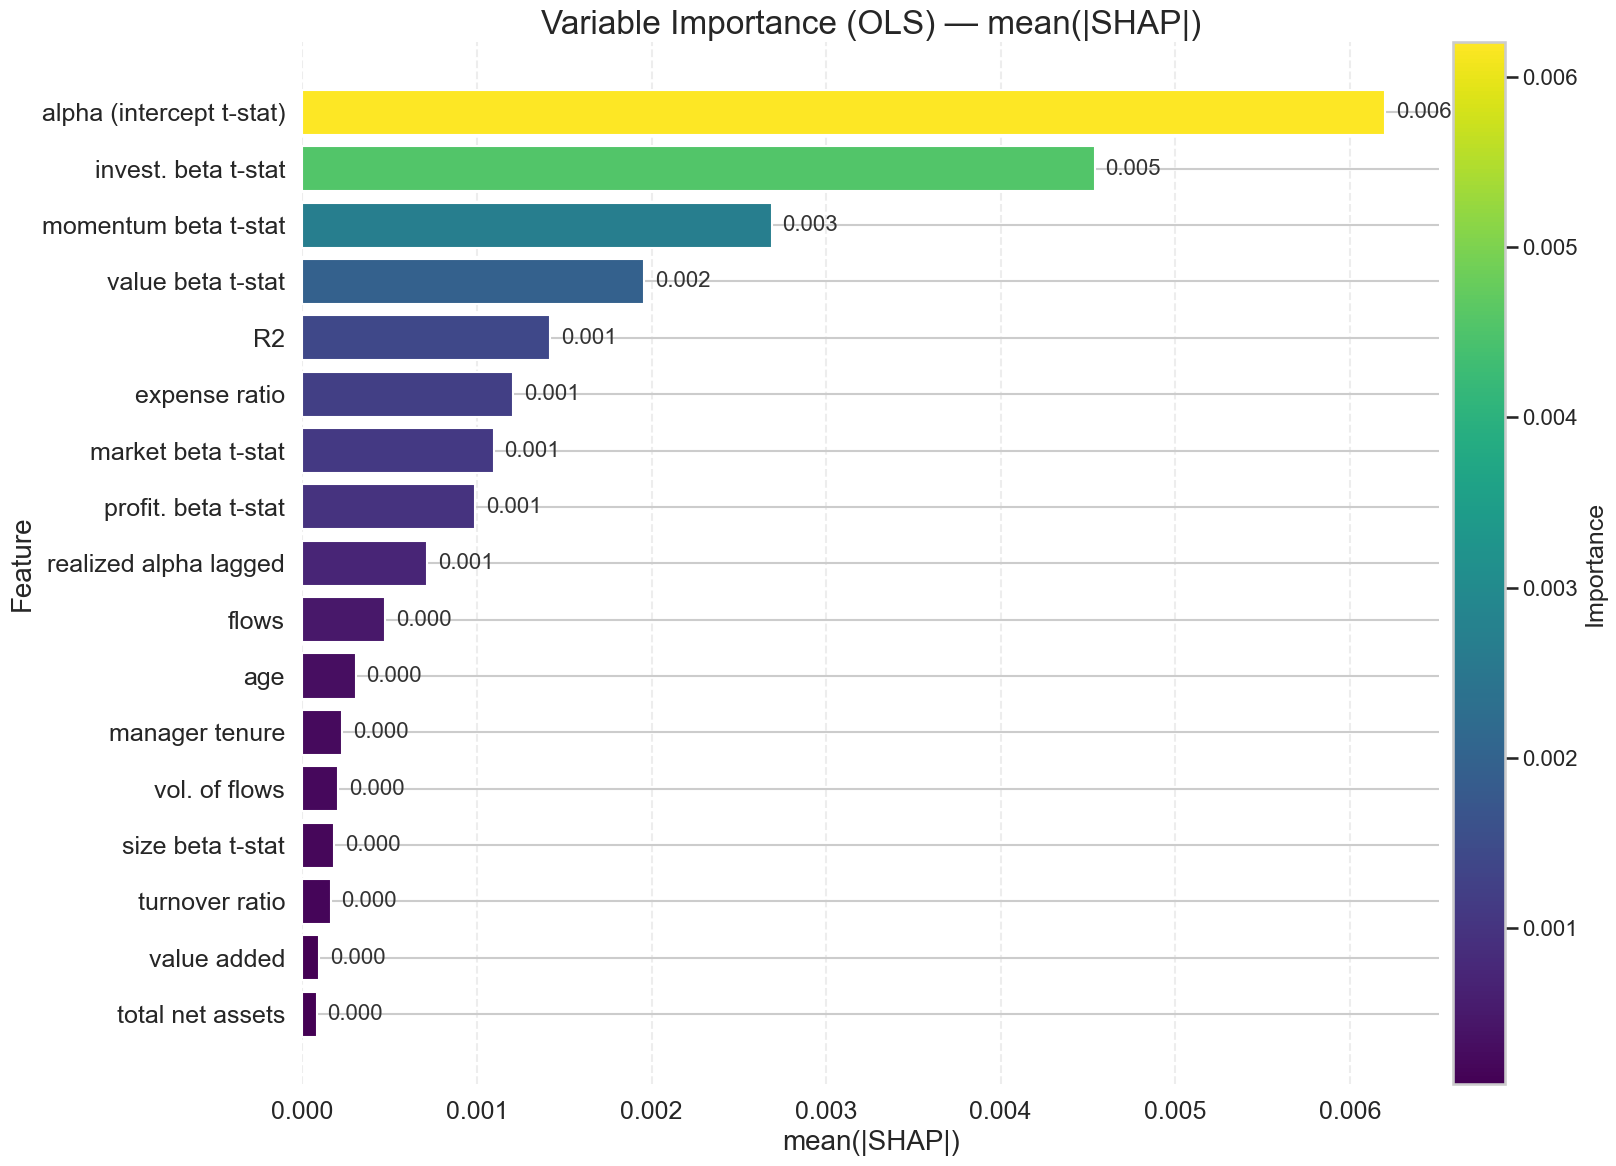

In [ ]:
sns.set_theme(style="whitegrid", context="talk")

df = abs_shap_values_mean.rename_axis('feature').reset_index(name='importance')

cmap = plt.cm.viridis
norm = plt.Normalize(df['importance'].min(), df['importance'].max())
colors = cmap(norm(df['importance'].values))

fig, ax = plt.subplots(figsize=(17, 12))

ax.barh(df['feature'], df['importance'], color=colors)
ax.invert_yaxis()

ax.set_xlabel('mean(|SHAP|)', fontsize=20)
ax.set_ylabel('Feature', fontsize=20)
ax.set_title('Variable Importance (OLS) — mean(|SHAP|)', fontsize=24)

plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax.grid(axis='x', linestyle='--', alpha=0.35)

sns.despine(left=True, bottom=True)

max_value = df['importance'].max()
for i, v in enumerate(df['importance']):
    ax.text(v + max_value*0.01, i, f'{v:.3f}', va='center', fontsize=16, color='#333')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Importance', fontsize=18)
cbar.ax.tick_params(labelsize=16)

plt.tight_layout()
plt.savefig("variable_importance_SHAP_OLS_styled.pdf", format="pdf", bbox_inches="tight")